In [1]:
import scanpy
import pandas as pd

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import matplotlib
matplotlib.__version__

'3.9.0'

In [ ]:
M = scanpy.read_mtx('GSE136831_RawCounts_Sparse.mtx/RawCounts_Sparse.mtx')
df_m = M.to_df()

In [8]:
df_meta = pd.read_csv('GSE136831_AllCells.Samples.CellType.MetadataTable.txt', sep='\t', index_col=0)

In [9]:
df_genes = pd.read_csv('GSE136831_AllCells.GeneIDs.txt',sep='\t')
gene_array = df_genes['HGNC_EnsemblAlt_GeneID']
gene_array

0                 TSPAN6
1                   TNMD
2                   DPM1
3                  SCYL3
4               C1orf112
              ...       
45942    ENSG00000227029
45943          RN7SL782P
45944    ENSG00000274532
45945    ENSG00000277705
45946    ENSG00000280139
Name: HGNC_EnsemblAlt_GeneID, Length: 45947, dtype: object

In [7]:
df_barcodes = pd.read_csv('GSE136831_AllCells.cellBarcodes.txt',sep='\t',names = ['barcode'])
barcode_array = df_barcodes['barcode']
barcode_array

0         001C_AAACCTGCATCGGGTC
1         001C_AAACCTGTCAACACCA
2         001C_AAACCTGTCACAGTAC
3         001C_AAACCTGTCTGTCTAT
4         001C_AAACGGGAGACTAAGT
                  ...          
312923     8CO_TTGTAGGCATCACGTA
312924     8CO_TTGTAGGTCCAGATCA
312925     8CO_TTTATGCGTAGGCTGA
312926     8CO_TTTGGTTTCTGCAAGT
312927     8CO_TTTGTCAAGCCCTAAT
Name: barcode, Length: 312928, dtype: object

In [ ]:
df_m.shape

In [ ]:
df_m.columns= barcode_array

In [ ]:
df_m.index = gene_array

In [ ]:
df_m

In [10]:
df_meta_cell_type = df_meta[df_meta['CellType_Category'] == 'Epithelial']
df_meta_cell_type

,nUMI,nGene,CellType_Category,Manuscript_Identity,Subclass_Cell_Identity,Disease_Identity,Subject_Identity,Library_Identity
CellBarcode_Identity,,,,,,,,
001C_AAAGTAGCAATGACCT,2282,1474,Epithelial,Basal,Basal,Control,001C,001C
001C_AACCGCGGTTATGTGC,4709,2548,Epithelial,Basal,Basal,Control,001C,001C
001C_ACACCCTCATTGTGCA,2079,1047,Epithelial,ATII,ATII_Low-Surfactants,Control,001C,001C
001C_ACAGCCGGTGTTGGGA,2830,1591,Epithelial,ATI,ATI,Control,001C,001C
001C_ACCGTAATCACTTCAT,10940,3782,Epithelial,Basal,Basal,Control,001C,001C
...,...,...,...,...,...,...,...,...
8CO_TCAGATGTCTTTAGGG,12581,4501,Epithelial,ATI,ATI,COPD,8CO,8CO
8CO_TGCCCATGTTATGTGC,8682,3171,Epithelial,ATI,ATI,COPD,8CO,8CO
8CO_TGGTTCCGTCTCACCT,4976,2147,Epithelial,ATII,ATII_Low-Surfactants,COPD,8CO,8CO


In [11]:
COPD_barcodes = df_meta_cell_type[df_meta_cell_type['Disease_Identity'] == 'COPD'].index
COPD_barcodes

Index(['052CO-a_AAACGGGGTCGGATCC', '052CO-a_AAACGGGGTTATCGGT',
       '052CO-a_AAAGCAACAAGACACG', '052CO-a_AAATGCCTCATTGCGA',
       '052CO-a_AACCGCGAGACTGGGT', '052CO-a_AACTGGTAGCTAGTTC',
       '052CO-a_AAGACCTGTCCCGACA', '052CO-a_AAGCCGCTCGGTCTAA',
       '052CO-a_AAGTCTGTCGGCCGAT', '052CO-a_AATCCAGAGCTGCGAA',
       ...
       '8CO_GTACTCCTCTGCTTGC', '8CO_GTCAAGTAGGTGCAAC', '8CO_GTCTCGTAGAGTGACC',
       '8CO_GTTCATTTCCAAAGTC', '8CO_TACGGATTCCTGCTTG', '8CO_TCAGATGTCTTTAGGG',
       '8CO_TGCCCATGTTATGTGC', '8CO_TGGTTCCGTCTCACCT', '8CO_TTGCCGTGTAAGTGTA',
       '8CO_TTGGCAAGTTCTGAAC'],
      dtype='object', name='CellBarcode_Identity', length=3154)

In [12]:
control_barcodes = df_meta_cell_type[df_meta_cell_type['Disease_Identity'] == 'Control'].index
control_barcodes

Index(['001C_AAAGTAGCAATGACCT', '001C_AACCGCGGTTATGTGC',
       '001C_ACACCCTCATTGTGCA', '001C_ACAGCCGGTGTTGGGA',
       '001C_ACCGTAATCACTTCAT', '001C_ACTATCTTCTGACCTC',
       '001C_ACTTTCAAGGCGACAT', '001C_AGCTCCTTCCAGGGCT',
       '001C_AGGGAGTGTTGTGGAG', '001C_AGGGATGCATCATCCC',
       ...
       '483C_TGTATTCCACGAGAGT', '483C_TTAGGCACACTTAAGC',
       '483C_TTGGAACAGACAGACC', '483C_TTGTAGGTCAACACAC',
       '483C_TTTCCTCAGCCCAATT', '484C_CTGTTTAGTCACCCAG',
       '484C_GAGTCCGGTAAGGGCT', '484C_GGACAAGCAAGCGCTC',
       '484C_GTTACAGCATGTAAGA', '484C_TCAATCTAGGTGATAT'],
      dtype='object', name='CellBarcode_Identity', length=4807)

In [ ]:
df_epithelial = df_m[df_meta_cell_type.index]
df_epithelial

In [ ]:
#run this only when doing a clean run
#df_epithelial.to_csv('epithelial.csv')

In [1]:
import pandas as pd
from bioinfokit.analys import norm

df_epithelial = pd.read_csv('epithelial.csv')


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df_epithelial=df_epithelial.set_index('HGNC_EnsemblAlt_GeneID')

In [3]:
nm = norm()
nm.cpm(df=df_epithelial)
# get CPM normalized dataframe
tpm_df = nm.cpm_norm

In [4]:
cpm_df=tpm_df

In [5]:
genes = ['HHIP', 'GLI1', 'GLI2', 'SNAI1', 'SNAI2', 'ZEB1', 'CDH1', 'CDH2']

HHIP 5774063.5 3.6994565021431086e-151 copd mean: 0.3841776285331297 control mean: 2.3108323068486825
GLI1 7596961.0 0.0931095172651441 copd mean: 0.03033073490635729 control mean: 0.015145206405450013
GLI2 7749633.0 8.601086846955609e-08 copd mean: 0.32780747598726084 control mean: 0.17112509181128305
SNAI1 7606224.5 0.08067466630711698 copd mean: 0.06141047299545743 control mean: 0.037102839675554375
SNAI2 7576305.0 0.6734883418719926 copd mean: 0.022173140239358857 control mean: 0.024207437397832637
ZEB1 8064765.5 8.156098585336356e-30 copd mean: 0.7651380634322076 control mean: 0.2824116892839412
CDH1 7148923.0 1.489837551637667e-05 copd mean: 6.598615376273662 control mean: 7.435662148805776
CDH2 7807305.0 1.2562364075807138e-17 copd mean: 0.3052891912207196 control mean: 0.08162581270036329


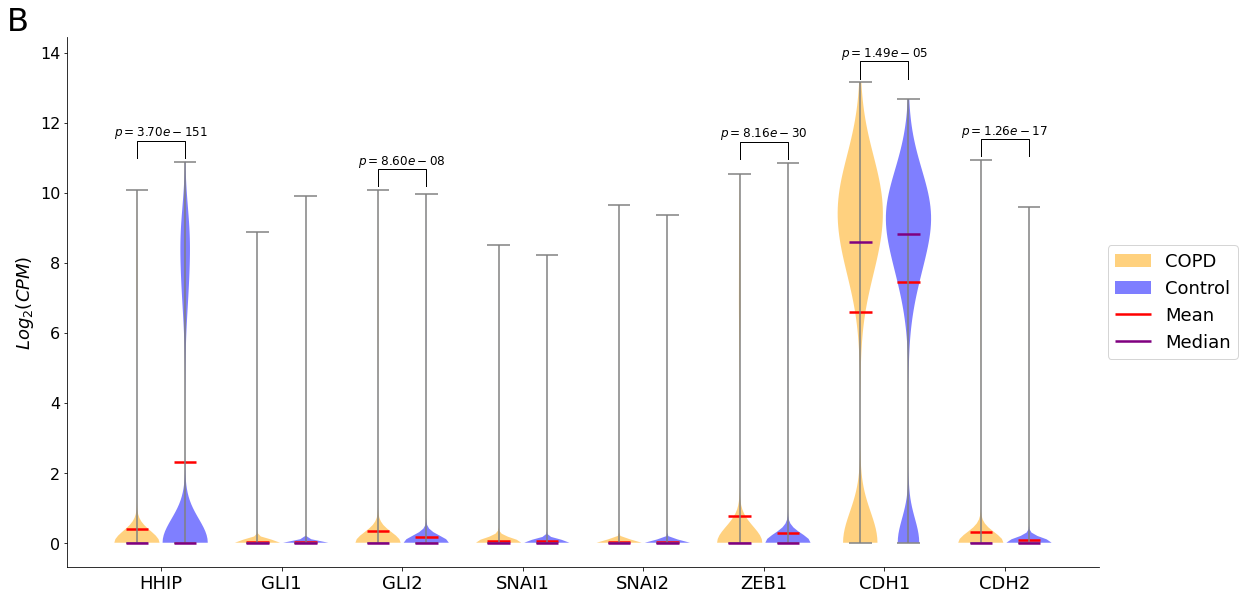

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
#gene = 'HHIP'    


space_between_groups=2
space_within_groups=0.8
x1=1
x2=1+space_within_groups


medianprops = dict(linestyle='--', linewidth=2.5, color='purple')
meanprops = dict(linestyle='-', linewidth=2.5, color='red')
fig, ax = plt.subplots(1,1,figsize=(15,8))

for gene in genes:
    
    copd_values=np.log2(cpm_df[COPD_barcodes].loc[gene].values+1)
    control_values=np.log2(cpm_df[control_barcodes].loc[gene].values+1)

    #bp = ax.boxplot([copd_values,control_values], positions = [x1, x2], widths = 0.5,patch_artist=True,medianprops=medianprops)
    bp = ax.violinplot([copd_values,control_values], positions = [x1, x2], widths = .75, showmeans=True, showmedians=True)
    colors=['orange','blue']
    #for patch, color in zip(bp['boxes'], colors):
    for patch, color in zip(bp['bodies'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
    bp['cmeans'].set_color(meanprops['color'])
    bp['cmeans'].set_linewidth(meanprops['linewidth'])
    bp['cmedians'].set_color(medianprops['color'])
    bp['cmedians'].set_linewidth(medianprops['linewidth'])
    bp['cbars'].set_color('grey')
    bp['cmins'].set_color('grey')
    bp['cmaxes'].set_color('grey')
    
    t_statistic_0,p_value_0=stats.mannwhitneyu(copd_values, control_values) 
    #t_statistic_0,p_value_0=stats.ranksums(copd_values, control_values) 
    print(gene,t_statistic_0,p_value_0, 'copd mean:', np.mean(copd_values), 'control mean:', np.mean(control_values))

    y = max(list(copd_values)+list(control_values))+0.1
    h = 0.5
    if p_value_0<0.05:
        stars=str(r'$p={:.2e}$'.format(p_value_0 ))
        if t_statistic_0<0:
            col='red'
        else:
            col='black'
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c=col)
        ax.text((x1+x2)*.5, y+h, stars, ha='center', va='bottom', color=col, fontsize=12)


    x1+=space_between_groups
    x2+=space_between_groups

ax.tick_params(axis='y', which='major', labelsize=16)
ax.set_xticks(np.arange(1,len(genes)*space_between_groups,space_between_groups)+0.5*space_within_groups)
ax.set_xticklabels(genes,fontsize=18)
fig.tight_layout()
#ax.axhline(y=local_min,color='red')
#axs[0,0].axhline(y=local_min,color='red')
ax.legend([bp["bodies"][0],bp["bodies"][1],bp['cmeans'],bp['cmedians']],['COPD','Control','Mean', 'Median'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=18)
#ax.legend([bp["boxes"][0],bp["boxes"][1]],['COPD','Control'],loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
ax.set_ylabel(r'$Log_2 (CPM)$', fontsize=18)
ax.text(ax.get_xlim()[0]-1,ax.get_ylim()[1]+.2,'B',fontsize=32)
plt.savefig('figures/Figure6B.png',bbox_inches='tight',dpi=300)
plt.savefig('figures/Figure6B.pdf',bbox_inches='tight')